In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print('다음 기기로 학습함 : ', device)

다음 기기로 학습함 :  cuda


In [3]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
training_epochs = 15
batch_size = 10

In [5]:
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                         train=True,
                         transform = transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download=True)

In [6]:
data_loader = DataLoader(dataset = mnist_train,
                        batch_size = batch_size,
                        shuffle = True,
                        drop_last = True)

In [7]:
linear = nn.Linear(784, 10, bias = True).to(device)

In [10]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [12]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.292999655
Epoch: 0002 cost = 0.285657197
Epoch: 0003 cost = 0.280929595
Epoch: 0004 cost = 0.278701931
Epoch: 0005 cost = 0.275017947
Epoch: 0006 cost = 0.273262739
Epoch: 0007 cost = 0.272298634
Epoch: 0008 cost = 0.270252436
Epoch: 0009 cost = 0.268797696
Epoch: 0010 cost = 0.267701298
Epoch: 0011 cost = 0.266413271
Epoch: 0012 cost = 0.265069991
Epoch: 0013 cost = 0.264545828
Epoch: 0014 cost = 0.263435185
Epoch: 0015 cost = 0.262879759
Learning finished


Accuracy :  0.8448999524116516
Label:  9
Prediction:  9


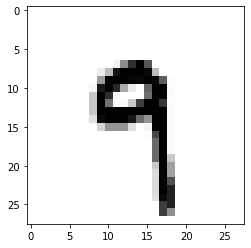

In [19]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())
    
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()